In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## Part 1: Prepare the Data

In [3]:
# List dataframe data types. Assess if there are any non-numeric data types that need to be changed.
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# Remove prior classification column
myopia_df = df.drop('MYOPIC', axis=1)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Check for null values
for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Check for duplicate entries
myopia_df.duplicated().sum()

0

In [7]:
# Standardise dataset
scaler = StandardScaler()

myopia_scaled = scaler.fit_transform(myopia_df)

In [8]:
myopia_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [9]:
# Create a DataFrame with the transformed data
myopia_scaled_df =  pd.DataFrame(myopia_scaled, columns=myopia_df.columns)
myopia_scaled_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2: Apply Dimensionality Reduction

In [10]:
# Perform dimensionality reduction with PCA.

# Initialise PCA Model
# Preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.9)

myopia_pca = pca.fit_transform(myopia_scaled_df)

In [11]:
myopia_pca.shape

(618, 10)

The PCA reduced the number of features to 10.

In [12]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [13]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

#### Reduce the dimensions further with t-SNE

In [14]:
type(myopia_pca)

numpy.ndarray

In [15]:
# Insert the array into a Dataframe
myopia_pca_df = pd.DataFrame(data=myopia_pca, columns=["PC01", "PC02", "PC03", "PC04","PC05", "PC06", "PC07", "PC08","PC09", "PC10"])
myopia_pca_df.head()

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [16]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

In [17]:
# Reduce dimensions
# Utilised pca dataframe as the aim is to further reduce the 10 features
tsne_features = tsne.fit_transform(myopia_pca_df)

C:\Users\shann\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [18]:
# Examine the reduction in dimensions.
tsne_features.shape

(618, 2)

In [19]:
# Create a scatterplot of the t-SNE output.
# Examine if there are distinct clusters using the initial un-scaled datasets.

myopia_df["x"] = tsne_features[:,0]
myopia_df["y"] = tsne_features[:,1]
myopia_df["class"] = df["MYOPIC"]

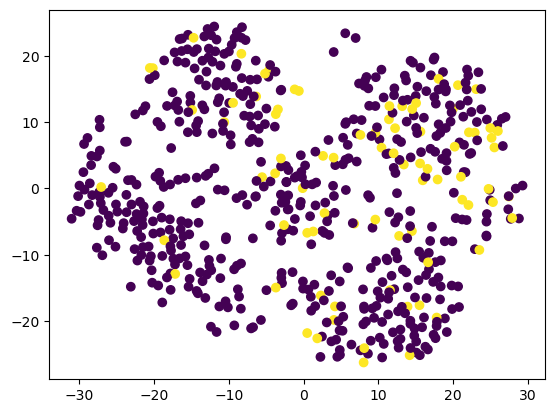

In [20]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=myopia_df["class"])
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

In [21]:
# Insert the reduced data into a dataframe and change column names
tsne_df = pd.DataFrame(tsne_features, columns=["PNC01", "PNC02"])
tsne_df.head()

,PNC01,PNC02
0,14.492542,-6.421170
1,13.902522,13.382768
2,-20.080557,-6.797635
3,-0.620421,14.711511
4,2.467128,-22.334652


In [22]:
# Initialise using 10 clusters from PCA, fit the data, then add the predicted classification to the df as the 'class' column.

model = KMeans(n_clusters=10, random_state=42)
model.fit(tsne_df)

predictions = model.predict(tsne_df)

tsne_df["class"] = model.labels_
tsne_df.head()

,PNC01,PNC02,class
0,14.492542,-6.421170,5
1,13.902522,13.382768,8
2,-20.080557,-6.797635,4
3,-0.620421,14.711511,7
4,2.467128,-22.334652,9


In [23]:
# Use a for loop to generate an elbow curve to find the optimal number of clusters
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Store data in data frame
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

C:\Users\shann\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,260349.686010
1,2,140042.314876
2,3,90009.597413
3,4,60157.846304
4,5,46432.764862
5,6,38719.969679
6,7,32291.173144
7,8,27223.206533
8,9,22654.462539
9,10,20428.163850


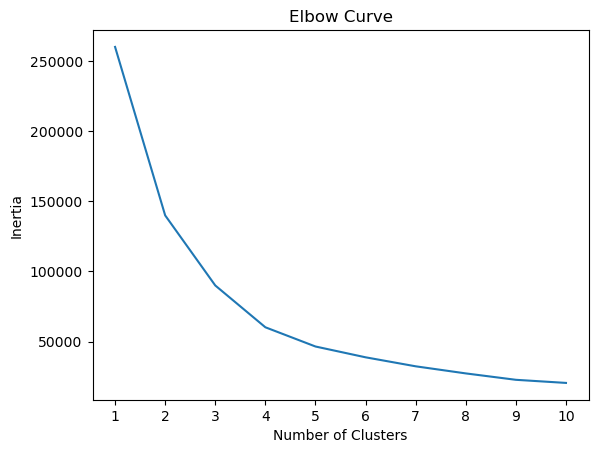

In [24]:
# Plot the for looped data to visualize the elbow curve
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [25]:
# From inspecting the Elbow Curve, the inflection point seems to be at 5 Clusters. 
# k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=42)

# Fit the model
model.fit(tsne_df)

# Predict clusters
predictions = model.predict(tsne_df)

# Add the predicted class column to the dataframe
tsne_df["class"] = model.labels_
tsne_df.head()

,PNC01,PNC02,class
0,14.492542,-6.421170,1
1,13.902522,13.382768,2
2,-20.080557,-6.797635,3
3,-0.620421,14.711511,4
4,2.467128,-22.334652,1


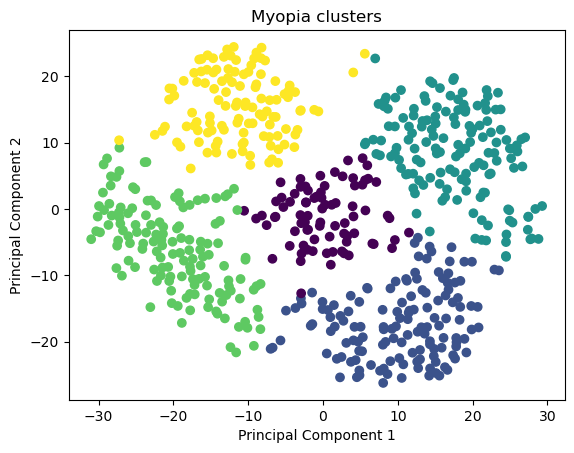

In [26]:
plt.scatter(x=tsne_df['PNC01'], y=tsne_df['PNC02'], c=tsne_df["class"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Myopia clusters')
plt.show()

## Part 4: Make a recommendation

The results of the analysis supports the hypothesis that there are distinct groups of patients within the myopia dataset that may be better analysed separately. The visualisation above suggests that there are 5 such groups.